In [68]:
# Import necessary libraries and set plot option
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math

# 1D Geometry

In this module you will be asked to do simple tasks on a 1D line. These are representitive of the tasks in a 1D CVT implementation.

## Simple Tasks

In [5]:
# Create 2 random numbers on the line segment [0,1]

x = np.random.rand(2,1)

print(x)

[[ 0.26191039]
 [ 0.15350777]]


In [ ]:
# calculate distance between the points in x, store in d

print(d)

In [ ]:
# calculate centre of the two points in x, store in c

print(c)

In [ ]:
# create 5 evenly spaced points over the interval [0,1], store in x_uniform

print (x_uniform)

In [ ]:
# Find the interval that contains x[1], store in interval_uniform

print (interval1)

In [ ]:
# Find point in x_uniform closest to x[1], store in nearest_uniform

print (nearest2)

In [ ]:
# create 5 randomly spaced points over the interval [0,1], store in x_random

print (x_random)

In [ ]:
# Find the interval that contains x[2], store in interval_random

print (interval_random)

In [ ]:
# Find the point in x_random that closest to x[2], store in nearest_random

print (nearest_random)


## Numerical Integration

One particular task we will need to do is approximate integrals. There are numerous ways to do this. 

### Uniform Sampling 

In 1D an integral can be approximated using a quadrature rule:
$$ \int_0^1 f(x)dx \approx \sum\limits_{i=1}^N  f(x_i)w_i$$ 
where $\{x_i\}$ $i=1,..., N$ are called quadrature points, and $\{w_i\}$, $i=1,..., N$ are called quadrature weights.

Let $\{x_i\}$ be $N$ equally spaced points in the interval [0,1]. Then we can use a simple left Reimann sum to approximate the integral, i.e.
$$ \int_0^1 f(x)dx \approx \sum\limits_{i=1}^{N-1} f(x_i)\Delta x$$
where $\Delta x = \frac{1}{N-1}$. 

In [ ]:
# Approximate the the integral of f(x)=x^2 on [0,1] using the points in x_uniform, store in int_reimann

f = lambda x: x^2 #define inline function


print (int_reimann)

In [ ]:
# Calculate error between your approximation and the exact integral, store in error_reimann

int_exact = 1/3

print (error_reimann)

In [63]:
# Write a function left_reimann_sum that takes as inputs 
# a number of points N 
# a function handle 
# and returns the approximate integral from [0,1] calculated using the left Reimann sum

def left_reimann_sum(N, f):
    
    x_list = np.linspace(0,1,N)
    dx = 1/(N-1)
    
    int_approx = 0
    
    for i in range(0,N-2):
        int_approx += dx*f(x_list[i])
        
    return int_approx

[0.27799031966717874, 0.14913359497013556, 0.07682568846118554, 0.038940971436480065, 0.019597819496853297]


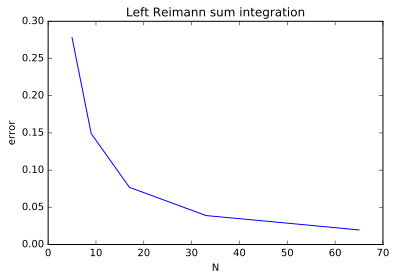

In [74]:
# Test this function on f(x)=sin(x) for N=5,9,17,33, store the errors in a list called err_reimann

N_list = [5,9,17,33,65]
err_reimann = []

f = lambda x: math.sin(x)
int_exact = -(math.cos(1) - 1)

for n in N_list:
    # call your left_reimann_sum with n and f, store in int_reimann
    
    int_reimann = left_reimann_sum(n, f)
    err_reimann.append(abs(int_exact - int_reimann))

# print and plot results
print(err_reimann)
plt.plot(N_list, err_reimann)
plt.xlabel('N')
plt.ylabel('error')
plt.title('Left Reimann sum integration')

### Random Sampling

Another way to approximate integrals is by random sampling. This is known as Monte Carlo integration. Given $N$ random points $\{x_i\}$ over the interval [0,1], we can approximate an integral as:
$$ \int_0^1 f(x) dx \approx \frac{1}{N}\sum\limits_{i=1}^N f(x_i).$$

In [ ]:
# Approximate the integral of f(x)=x^2 over the interval [0,1] using the points in x_random, store in int_monte_carlo

f = lambda x: x^2


print(int_monte_carlo)

In [ ]:
# Calculate the error between the Monte Carlo approximation and the exact solution, store in error_monte_carlo

int exact = 1/3


print(error_monte_carlo)

In [48]:
# Write a function monte_carlo_integration that takes as inputs 
# a number of points N 
# a function handle 
# and returns the approximate integral from [0,1] calculated using Monte Carlo integration

def monte_carlo_integration(N, f):
    
    random_list = np.random.rand(N,1)
    
    int_approx = 0
    for i in range(1,N):
        int_approx += f(random_list[i])/N
    
    return int_approx

[0.1706127813929385, 0.005971303549555607, 0.009439637100712162, 0.0003421477376665538, 0.0018628346084782477, 2.2662014377672346e-05]


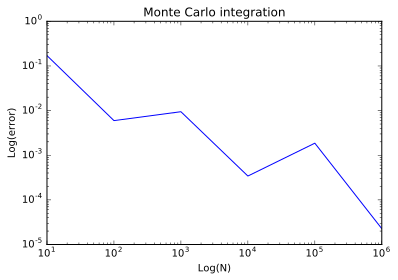

In [73]:
# Test this function on f(x)=sin(x) for N=10,100,1000,10000,100000,1000000, plot the error vs N on a log-log plot

N_list = [10,100,1000,10000,100000,1000000]
err_monte_carlo = []
f = lambda x: math.sin(x)

int_exact = -(math.cos(1) - 1)

for n in N_list:
    # call your monte_carlo_integration with n and f, store in int_monte_carlo
    
    int_monte_carlo = monte_carlo_integration(n, f)
    err_monte_carlo.append(abs(int_exact - int_monte_carlo))

# print and plot results
print(err_monte_carlo)

plt.loglog(N_list, err_monte_carlo)
plt.xlabel('Log(N)')
plt.ylabel('Log(error)')
plt.title('Monte Carlo integration')